In [1]:
%matplotlib inline

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox

from sklearn.datasets import make_blobs, load_iris, make_circles, fetch_20newsgroups, make_s_curve, load_digits, fetch_lfw_people

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import Isomap, MDS, TSNE, LocallyLinearEmbedding, SpectralEmbedding

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomTreesEmbedding
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

from time import time

In [120]:
LOKY_MAX_CPU_COUNT = 2

# Dimensionality Reduction

In [3]:
iris = load_iris()

In [4]:
attributes, target = iris['data'], iris['target']

When we have Dimensionality Reduction, we fit it to the training data, not to the whole dataset.

<b>PCA</b>

PCA is unsupervised method. It does not have target.

In [5]:
pca = PCA()

In [6]:
pca.fit(attributes)

PCA()

In [7]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [8]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [9]:
transformed_attr = pca.transform(attributes)

In [10]:
transformed_attr.shape, attributes.shape

((150, 4), (150, 4))

The basis has been changed.

In [11]:
transformed_attr

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [12]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

In [13]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

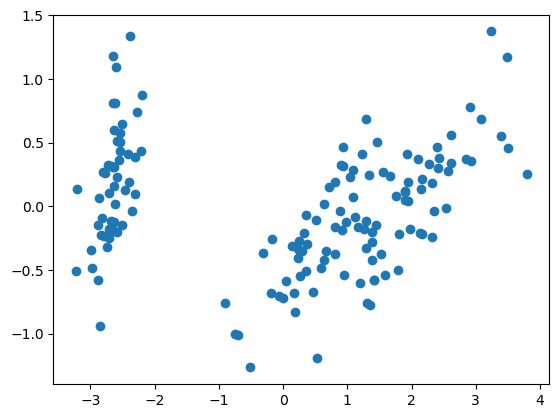

In [14]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

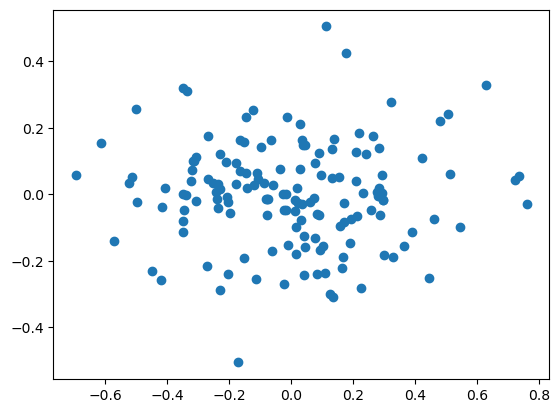

In [15]:
plt.scatter(transformed_attr[:, 2], transformed_attr[:, 3])
plt.show()

<b>PCA -> n_components</b>

In [16]:
pca = PCA(n_components = 2)

In [17]:
pca.fit(attributes)

PCA(n_components=2)

In [18]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [19]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [20]:
transformed_attr = pca.transform(attributes)

In [21]:
transformed_attr.shape, attributes.shape

((150, 2), (150, 4))

In [22]:
transformed_attr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [23]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143])

In [24]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

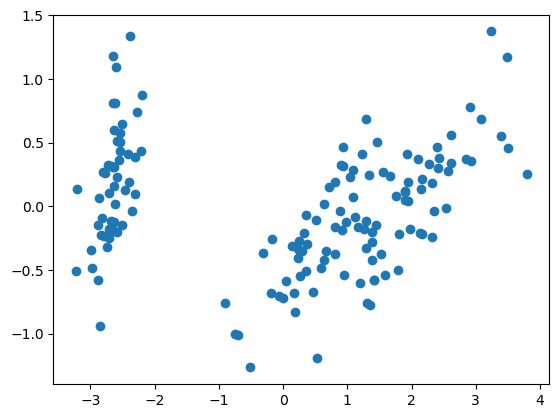

In [25]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

<b>Explained variance</b>

In [26]:
pca = PCA()

In [27]:
pca.fit(attributes)

PCA()

In [28]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [29]:
transformed_attr = pca.transform(attributes)

In [30]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

In [31]:
attributes.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [32]:
pca.explained_variance_.sum()

4.572957046979804

In [33]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [34]:
pca.explained_variance_ratio_.sum()

1.0

In [35]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

<b>setting the n_components to a value of explained variance</b>

In [36]:
pca = PCA(n_components = 0.98)

In [37]:
pca.fit(attributes)

PCA(n_components=0.98)

In [38]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [39]:
transformed_attr = pca.transform(attributes)

In [40]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 ])

In [41]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782])

n_components = 0.95

In [43]:
pca = PCA(n_components = 0.95)

In [44]:
pca.fit(attributes)

PCA(n_components=0.95)

In [45]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [46]:
transformed_attr = pca.transform(attributes)

In [47]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

In [48]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [49]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521])

<b>PCA on Goussian blob dataset</b>

In [50]:
x = np.random.normal(3.5, scale = 3, size = 500)

In [51]:
y = np.random.normal(2.4, scale = 2, size = 500)

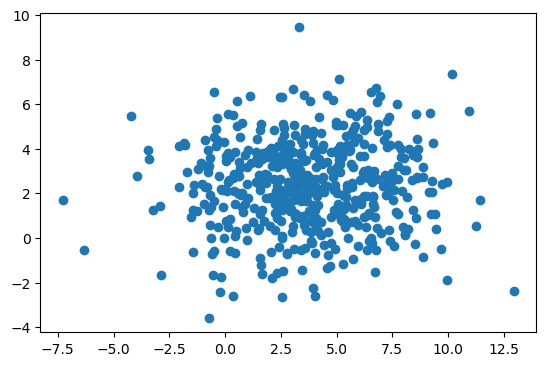

In [52]:
plt.scatter(x, y)
plt.gca().set_aspect('equal')
plt.show()

In [53]:
points = np.array([x, y]).reshape(500, 2)
points[:10]

array([[ 5.21045427,  0.16518061],
       [ 3.4195543 ,  9.42076003],
       [ 6.4683459 ,  7.94959461],
       [ 7.36239232,  0.3409689 ],
       [ 0.44824021,  1.39526114],
       [ 2.99483001,  7.2615813 ],
       [ 7.99918453,  1.27233007],
       [ 3.59791283,  4.96191603],
       [-1.40159138,  4.60527664],
       [ 9.27267683,  0.10958731]])

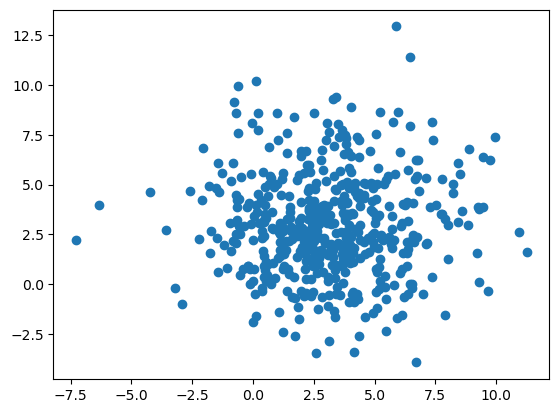

In [54]:
plt.scatter(points[:, 0], points[:, 1])

In [55]:
results = points @ np.array([[1, 0.5], [0.6, 1]])

In [56]:
results[:10]

array([[ 5.30956264,  2.77040775],
       [ 9.07201032, 11.13053718],
       [11.23810266, 11.18376755],
       [ 7.56697366,  4.02216506],
       [ 1.28539689,  1.61938125],
       [ 7.35177879,  8.75899631],
       [ 8.76258257,  5.27192233],
       [ 6.57506245,  6.76087244],
       [ 1.3615746 ,  3.90448095],
       [ 9.33842921,  4.74592572]])

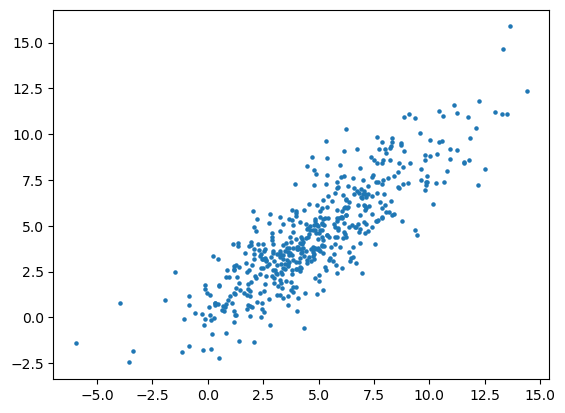

In [57]:
plt.scatter(results[:, 0], results[:, 1], s = 5)

In [58]:
data = results.copy()

In [59]:
center = data.mean(axis = 0)
center

array([4.87307015, 4.51424083])

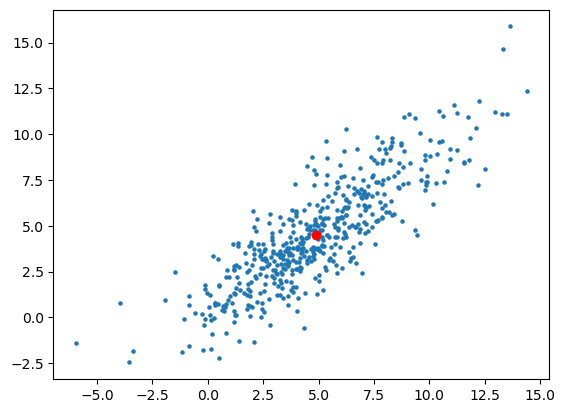

In [60]:
plt.scatter(results[:, 0], results[:, 1], s = 5)
plt.scatter(center[0], center[1], c = 'red')
plt.show()

In [61]:
np.corrcoef(data, rowvar = False)

array([[1.        , 0.84844886],
       [0.84844886, 1.        ]])

In [62]:
np.cov(data, rowvar = False)

array([[9.50388554, 7.60154722],
       [7.60154722, 8.44600731]])

The covariation of a variable with itself is its dispersion of its values / variance.

It is a symmetric matrix, which means that its eigenvectors are orthogonal. However, they are not normalized i.e. their norm is different (the norm of the first eigenvector is greater than the norm of the second, which is greater than the norm of the third, and so on). 

The covariation matrix is converted to to a diagonal matrix, where all the elements outside the main diagonal are zero.

\begin{pmatrix}
\lambda_1 & 0 & 0 & \dots & 0 \\
0 & \lambda_2 & 0 & \dots & 0 \\
0 & 0 & \lambda_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & \lambda_n
\end{pmatrix}

In [63]:
covariance_matrix = np.cov(data - center, rowvar = False) # by subtracting the mean, we center the data

In [64]:
np.linalg.eig(covariance_matrix)

EigResult(eigenvalues=array([16.59487403,  1.35501882]), eigenvectors=array([[ 0.73123705, -0.68212343],
       [ 0.68212343,  0.73123705]]))

Eigenvalues correspond to the values of the diagonal in a diagonal matrix, the other elements are zeros. Eigenvectors form the basis for the transformation that diagonalizes the original matrix. 

In [65]:
# checking if they are orthogonal -> they are
np.linalg.eig(covariance_matrix).eigenvectors

array([[ 0.73123705, -0.68212343],
       [ 0.68212343,  0.73123705]])

In [66]:
# scalar product -> it is 0, so they are orthogonal
np.dot(np.linalg.eig(covariance_matrix).eigenvectors[:, 0], np.linalg.eig(covariance_matrix).eigenvectors[:, 1])

0.0

In [67]:
pca.fit(data).components_ # PCs correspond to the eigenvectors

array([[ 0.73123705,  0.68212343],
       [-0.68212343,  0.73123705]])

pca.transform -> transforms the original data according to the new basis vectors (the principal components are the new basis vectors).

In [68]:
transformed_data = pca.transform(data)

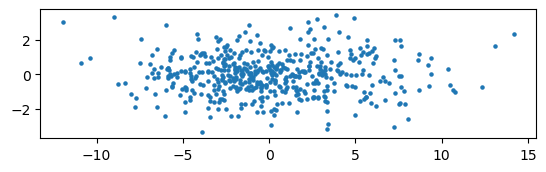

In [69]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

These are the eigen coordinates of the dataset.

<b>PC1</b>

In [70]:
pca = PCA(n_components = 1)

In [71]:
pca.fit(data)

PCA(n_components=1)

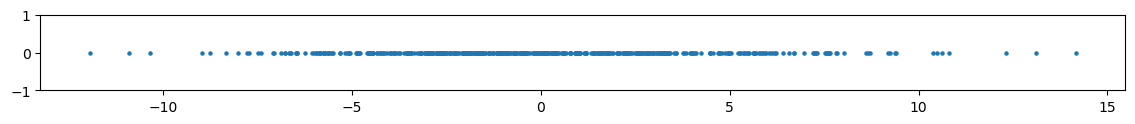

In [72]:
plt.figure(figsize = (14, 10))
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 5)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')
plt.show()

Some information is lost, but it is minimal.

PCA is very useful when we have big data. it is not applicable to sparse matrices.

PCA makes singular value decomposition.

In [73]:
texts = fetch_20newsgroups()['data'][:50]

In [74]:
tfidf = TfidfVectorizer()

In [75]:
tfidf.fit(texts)

TfidfVectorizer()

In [76]:
tfidf_result = tfidf.transform(texts)

In [77]:
tfidf_result

<50x3612 sparse matrix of type '<class 'numpy.float64'>'
	with 7607 stored elements in Compressed Sparse Row format>

In [78]:
tfidf_dr = PCA(n_components = 300)

But PCA could not be used here and will give an error, because it cannot work on sparse matrices.

Another method can be used, but the ordering from the highest to the lowest explained variance will be lost.

<b>TruncatedSVD</b>

Truncated SVD (Singular Value Decomposition) is a dimensionality reduction technique that can be used for large, sparse datasets, such as text data in Natural Language Processing. It decomposes a matrix into three components — U (left singular vectors), Σ (diagonal matrix of singular values), and V^T (right singular vectors). It keeps only the top k components, and thus, reduces the number of features while retaining as much variance as possible (similar to PCA), but it is particularly suited for sparse matrices.

In [84]:
tfidf_dr = TruncatedSVD(n_components = 25)

<b>KernelPCA</b>

In [88]:
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf')

In [89]:
kernel_pca.fit(data)

KernelPCA(kernel='rbf', n_components=2)

In [91]:
kernel_pcs = kernel_pca.transform(data)

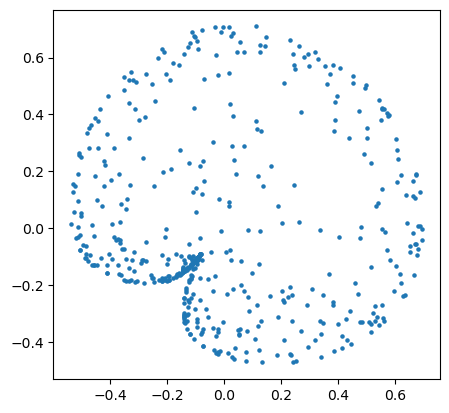

In [92]:
plt.scatter(kernel_pcs[:, 0], kernel_pcs[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

In [94]:
kernel_pca = KernelPCA(kernel = 'rbf', gamma = 5)

In [95]:
kernel_pca.fit(data)

KernelPCA(gamma=5, kernel='rbf')

In [96]:
kernel_pcs = kernel_pca.transform(data)

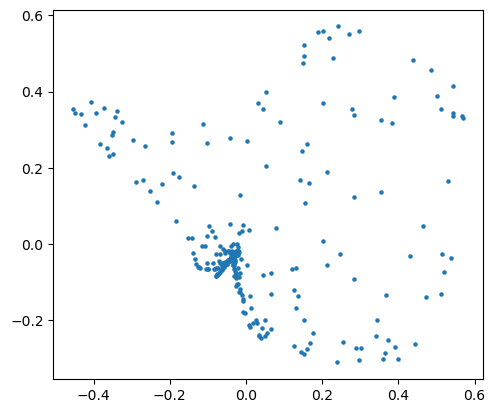

In [97]:
plt.scatter(kernel_pcs[:, 0], kernel_pcs[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

<b>Linear Discriminant Analysis (LDA / LinDA)</b>

LDA is a supervised method. It tries to identify the attributes that account for the most variance between classes. It returns a transformation of the input data (like PCA).

Code source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

explained variance ratio (first two components): [0.92461872 0.05306648]


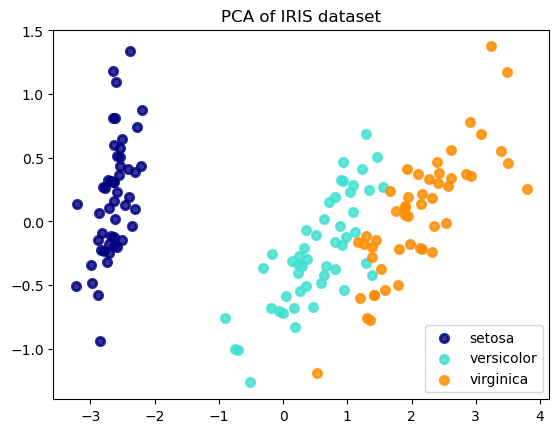

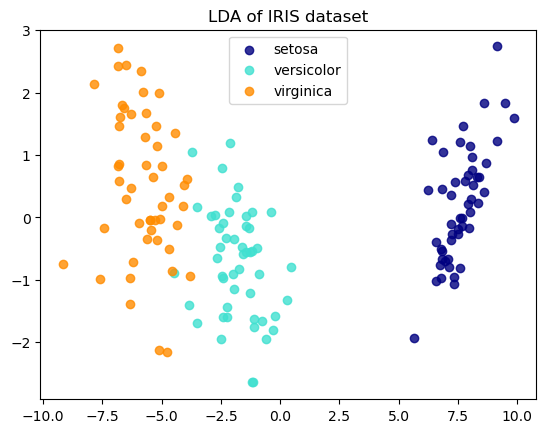

In [109]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(f"explained variance ratio (first two components): {str(pca.explained_variance_ratio_)}")

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

# Manifold Llearning

embedding -> a 2D form (manifold, surface) in 3D space

<b>Isometric mapping (Isomap)</b>

Find the kNN of each point -> Construct a connectivity graph /Two points are connected if they're neighbors (from the first step)/ -> Compute shortest paths (Dijkstra, Floyd – Warshall) -> Perform projection on the graph

Very useful for illustration.

In [111]:
isomap = Isomap(n_neighbors = 5, n_components = 2)
transformed_data = isomap.fit_transform(data)

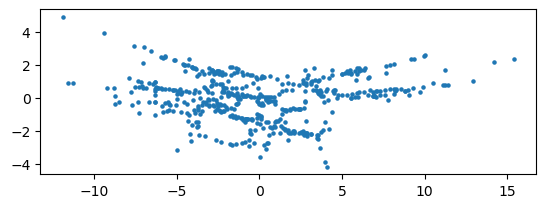

In [112]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

## Implementation of Isomap

Source: https://www.geeksforgeeks.org/isomap-a-non-linear-dimensionality-reduction-technique/

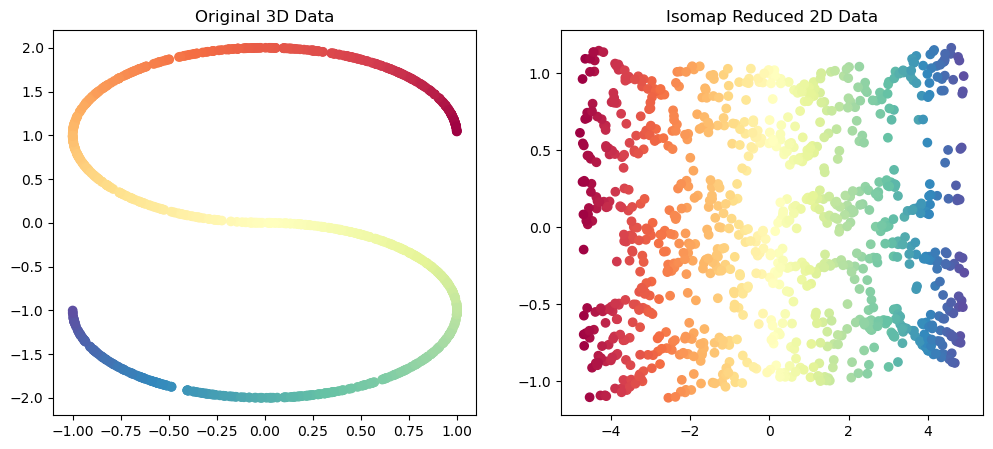

In [115]:
# Generate S-curve data
X, color = make_s_curve(n_samples=1000, random_state=42)

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

# Plot the original and reduced-dimensional data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax[0].set_title('Original 3D Data')

ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

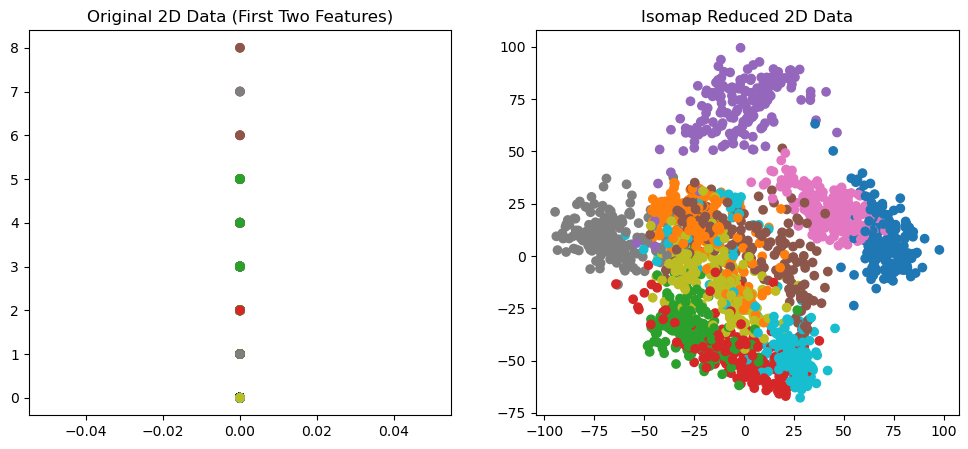

In [121]:
# Load the digits dataset
digits = load_digits()

# Apply Isomap
isomap = Isomap(n_neighbors=30, n_components=2)
digits_isomap = isomap.fit_transform(digits.data)

# Plot the original and reduced-dimensional data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(digits.data[:, 0], digits.data[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[0].set_title('Original 2D Data (First Two Features)')

ax[1].scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

<b>t-SNE</b>

t-distributed Stochastic Neighbor Embedding

t-SNE looks for local clusters in the data. It is useful for revealing clusters and structure. t-SNE focuses on preserving the local structure of the data, meaning it tries to ensure that points that are close together in the high-dimensional space remain close in the lower-dimensional space. It does this by modeling pairwise similarities between points and seeks to maintain these relationships when projecting the data into two or three dimensions, which makes it very useful for visualizing clusters and local neighborhoods.

In [138]:
tsne = TSNE(n_components = 2, init = "pca")
transformed_data = tsne.fit_transform(data)

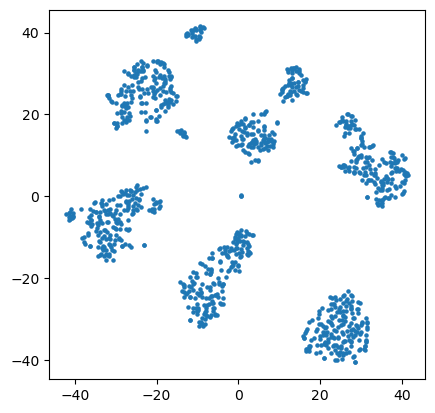

In [139]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

Source: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [122]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

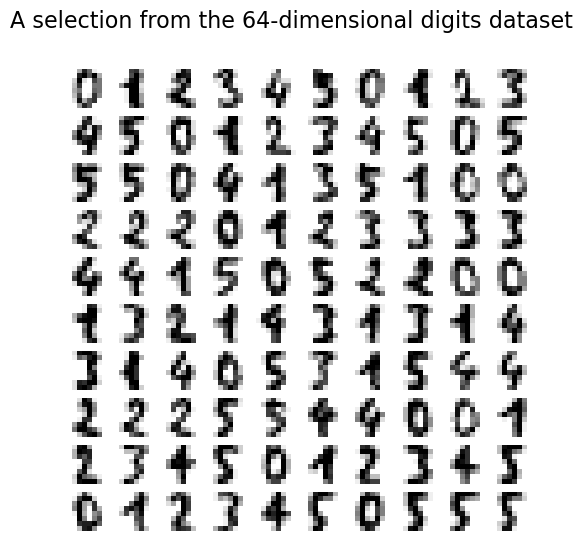

In [124]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [134]:
def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [135]:
embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embedding": TSNE(
        n_components=2,
        max_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [136]:
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embedding...
Computing NCA embedding...


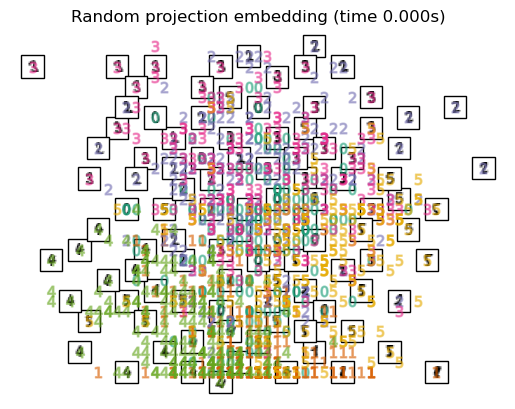

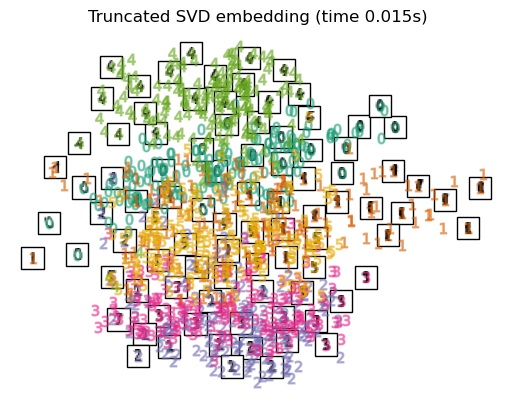

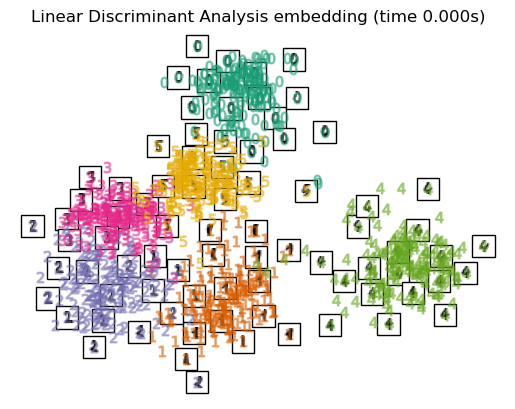

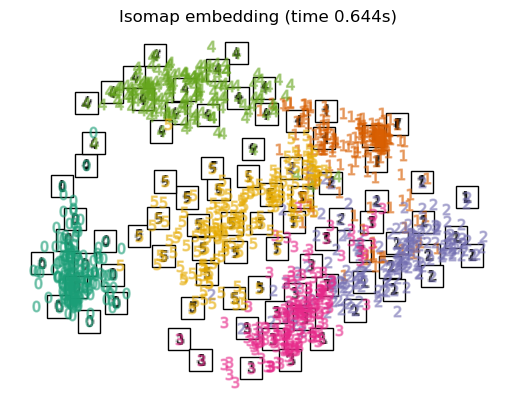

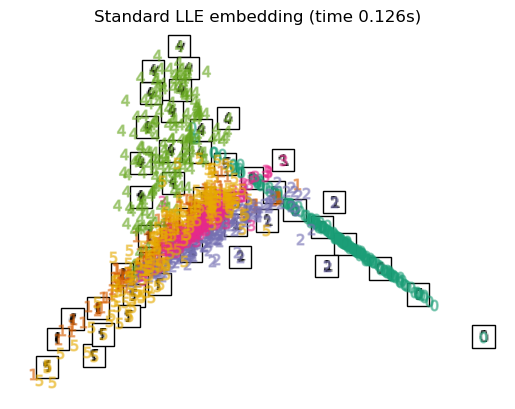

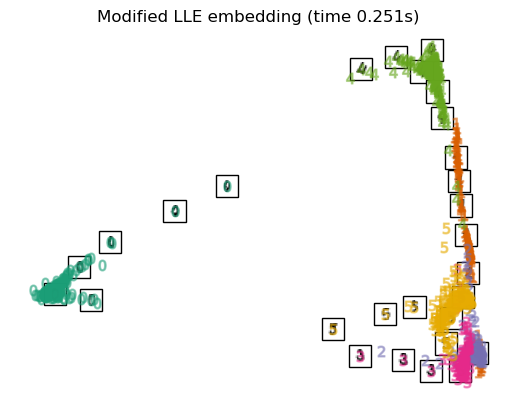

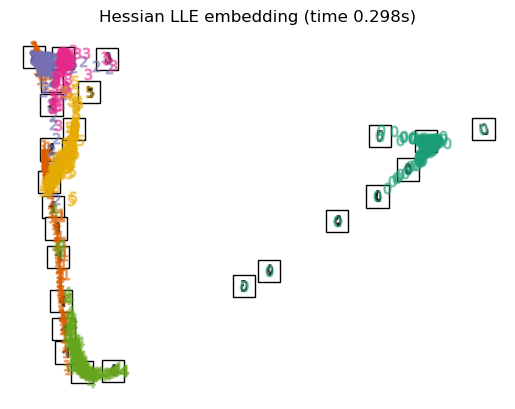

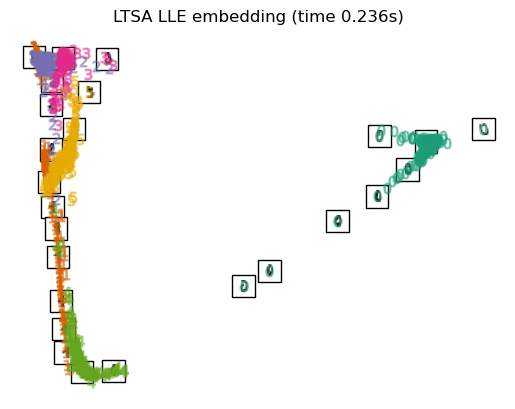

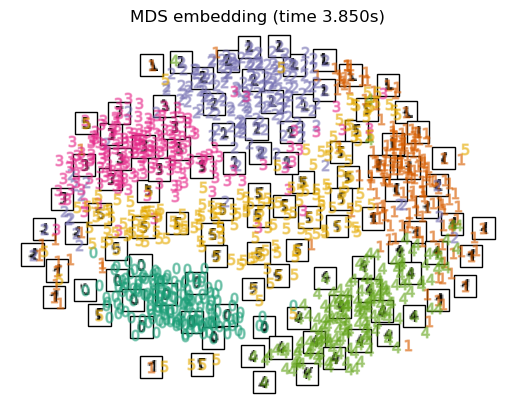

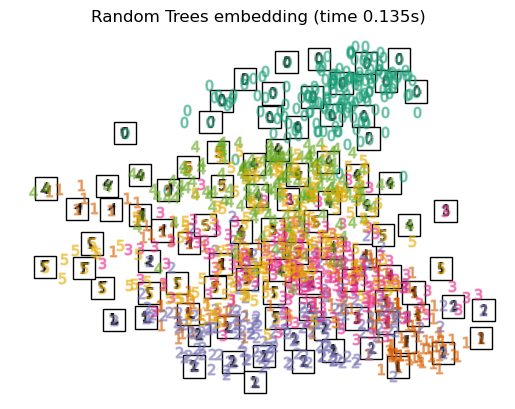

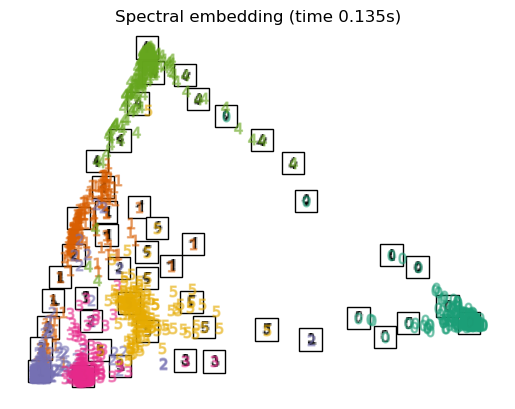

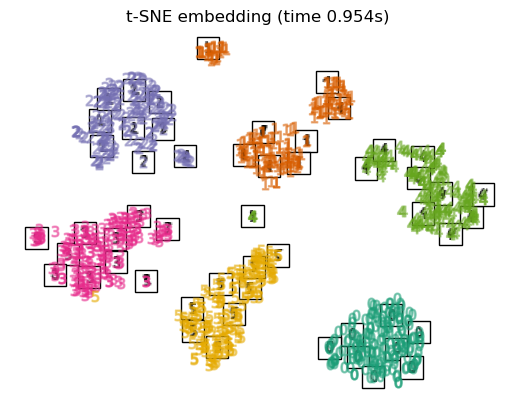

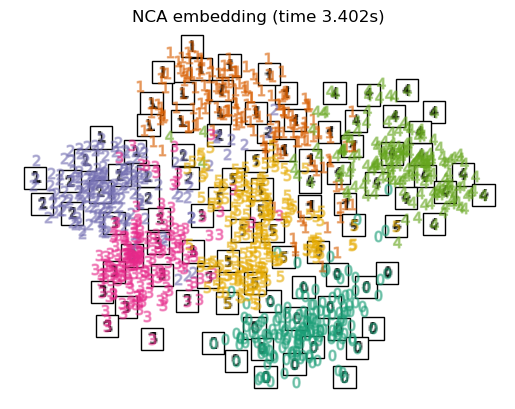

In [137]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

<b>Topic modeling</b>

LatDA (Latent Dirichlet Allocation) -> most widely-used algorithm for topic extraction.

NMF (Non-negative Matrix Factorization) -> used for topic extraction, simpler than LatDA. 